# Лекция 6. Собственные векторы, собственные значения. Разложение Шура и QR-алгоритм 

## На прошлой лекции

- Разреженные матрицы
- Форматы их хранения
- Особенности вычисления LU разложения

## План на сегодня далее

- Собственные векторы и их приложения (PageRank)
- Круги Гершгорина
- Степенной метод вычисления собственных векторов и значений
- Теорема Шура
- Нормальные матрицы
- QR алгоритм

## Что такое собственный вектор?

**Определение.** Вектор $x \ne 0$ называется **собственным** для квадратной матрицы $A$, если найдётся такое число $\lambda$ что

$$
   Ax = \lambda x.
$$

Число $\lambda$ называется **собственным значением**.

- Определение означает, что матрица $A - \lambda I$ должна быть вырождена
- Как алгебраически определить такие числа $\lambda$, что матрица $A - \lambda I$ является вырожденной?
- Для этого нужно ввести ещё одну функцию на множестве матриц под названием **определитель** (a.k.a детерминант, не путать с дискриминантом!)
- Обозначение $\det(A)$.

## Определитель

- Формальное опредеделение детерминанта довольно неочевидно, поэтому покажем, как его можно вычислить и какие свойства есть у этой функции
    - она определена только для квадратных матриц
    - если матрица вырождена, то её детерминант равен 0
    - если переставить две строки матрицы, то детерминант умножится на $-1$
    - $\det(AB) = \det(A) \det(B)$
- Рассмотрим матрицу $A = \begin{bmatrix} 1 & 2 & -1 \\ 0 & 3 & 1 \\ -3 & 2 & 1 \end{bmatrix}$
- Детерминант этой матрицы может быть вычислен с помощью следующей процедуры - разложение по первой строке:

$$ \det(A) = 1 \cdot (3 \cdot 1 - 2 \cdot 1) - 2 \cdot (0 \cdot 1 - 1 \cdot (-3) ) + (-1)\cdot (0 \cdot 2 - 3 \cdot (-3)) =  1 - 6 - 9 = -14$$

In [5]:
import numpy as np

A = np.array([[1, 2, -1], [0, 3, 1], [-3, 2, 1]])
print(np.linalg.det(A))
A = np.array([[0, 3, 1], [1, 2, -1], [-3, 2, 1]])
print(np.linalg.det(A))
n = 5
x = np.random.randn(n)
A = np.outer(x, x)
print(np.linalg.det(A))

-14.000000000000004
14.000000000000004
-2.9406243837545236e-65


## Вычисление дереминанта и LU разложение

- Детерминант треугольной матрицы - произведение диагональных элементов
- $A = PLU \to \det(A) = \det(P)\det(L)\det(U)$
- На диагонали $L$ стоят 1, значит $\det(A) = \det(P)\det(U)$
- $\det(U) = \prod_{i=1}^n u_{ii}$
- $\det(P) = (-1)^s$, где $s$ - число перестановок строк
- Таким образом, вычисление детерминанта стоит $O(n^3)$

## Вернёмся к определение собственных векторов и значений

- Так как матрица $A - \lambda I$ должна быть вырождена, то 

$$ \det (A - \lambda I) = 0.$$

- Это есть некоторый многочлен от $\lambda$ с коэффициентами, зависящими от элементов матрицы $A$
- Это уравнение на $\lambda$ называется *характеристическим уравнением*

### Вычислим собственные векторы для тестовой матрицы


- $\begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}$ 
- Тогда $\det(A - \lambda I) = \det\left(\begin{bmatrix} 1 - \lambda & 2 \\ 0 & 3 - \lambda \end{bmatrix} \right) = (1 - \lambda)(3 - \lambda) = 0$
- То есть имеем два собственных значения $\lambda_1 = 1$ и $\lambda_2 = 3$
- Найдём собственные векторы для них

$$\begin{bmatrix} 0 & 2 \\ 0 & 2 \end{bmatrix} x = 0 \to x = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

$$ \begin{bmatrix} -2 & 2 \\ 0 & 0 \end{bmatrix} x = 0 \to x = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$ 

- Заметим, что вектор $\alpha x$ такжде является собственным, поэтому часто для удобства доволнительно требуют нормировки собственных векторов
- Сразу скажем, что такой способ вычисления собственных чисел и векторов является численно неустойчивым, подробности далее...

## Разложение по собственным векторам (eigendecomposition)

Если матрица  $A$ размера $n\times n$ имеет $n$ собственных векторов $s_i$, $i=1,\dots,n$:

$$ As_i = \lambda_i s_i, $$

то это может быть записано в виде

$$ A S = S \Lambda, \quad\text{где}\quad S=(s_1,\dots,s_n), \quad \Lambda = \text{diag}(\lambda_1, \dots, \lambda_n),$$

или эквивалентно

$$ A = S\Lambda S^{-1}. $$

Такая форма представления матрицы $A$ называется разложением по собственным векторам (**eigendecomposition**). Матрицы, которые могут быть представлены в таком виде, называются **диагонализуемыми**.

In [16]:
import numpy as np

A = np.array([[1, 2, -1], [0, 3, 1], [-3, 2, 1]])

eigvals, eigvec = np.linalg.eig(A)
print(eigvals, "\n", eigvec)
print(np.trace(A), np.sum(eigvals))
print(np.linalg.norm(A - eigvec @ np.diag(eigvals) @ np.linalg.inv(eigvec)))

A = np.random.randint(-10, 10, size=(3, 3))
A = A + A.T
print(A)
eigvals, eigvec = np.linalg.eigh(A)
print(np.linalg.norm(A - eigvec @ np.diag(eigvals) @ eigvec.T))

[-1.33691198+0.j          3.16845599+0.65786032j  3.16845599-0.65786032j] 
 [[ 0.52030162+0.j          0.46476996-0.34559744j  0.46476996+0.34559744j]
 [-0.19187565+0.j          0.67439714+0.j          0.67439714-0.j        ]
 [ 0.8321478 +0.j          0.11360624+0.44365912j  0.11360624-0.44365912j]]
5 (4.999999999999995+0j)
3.5294401943817508e-15
[[ 14   5 -14]
 [  5  14   2]
 [-14   2  14]]
4.189529226675416e-15


## Существование

- Какие матрицы являются диагонализуемыми?

- Простым примером являются матрицы, у которых все собственные значения различны.
Более общий факт звучит так: 

матрица диагонализуема тогда и только тогда, когда **алгебраическая кратность** каждого собственного значения (кратность корня характеристического многочлена) совпадает с его **геометрической кратностью** (размерностью собственного подпространства). 

- Для наших целей наиболее важный класс диагонализуемых матриц – это класс **нормальных матриц**: 

$$AA^* = A^* A.$$

Почему такие матрицы диагонализуемы станет ясно чуть позже.

#### Пример

* Легко проверить, что матрица $$A = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix}$$ имеет одно собственное значение  $1$ кратности $2$ (поскольку характеристический многочлен имеет вид $p(\lambda)=(1-\lambda)^2$), но только один собственный вектор  $\begin{pmatrix} c \\ 0  \end{pmatrix}$ и следовательно такая матрица недиагонализуема.

## Почему важны собственные векторы и собственные значения?

- Собственные векторы имеют как важное теоретическое значения, так и многочисленные приложения.
- Весь микромир подчиняется законам следующим из **уравнения Шрёдингера**, которое является задачей на поиск собственного вектора и собственного значения:

$$
    H \psi = E \psi,
$$

где $E$ – нижний уровень энергии, $\psi$ – волновая функция и $H$ – гамильтониан.  
- Более половины вычислительных мощностей в мире тратится на решение задач такого типа для задач дизайна материалов и разработки новых лекарств 

## Собственные значения – это частоты выбраций

Обычно вычисление собственных значений и собственных векторов необходимо для изучения

- вибраций в механических структурах
- снижения сложности моделей сложных систем

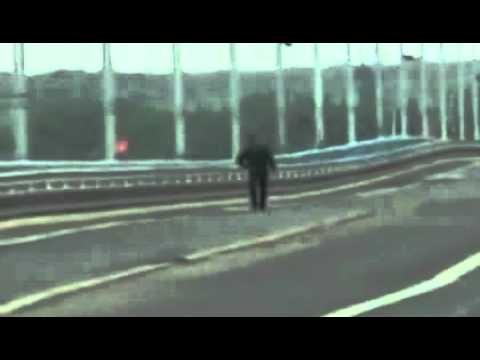

In [1]:
from IPython.display import YouTubeVideo 
YouTubeVideo("xKGA3RNzvKg")

## Google PageRank

Одна из самых известных задач, сводящихся к вычислению собственного вектора, – это задача вычисления **Google PageRank**. 

- Задача состоит в ранжировании веб-страниц: какие из них являются важными, а какие нет
- В интернете страницы ссылаются друг на друга
- PageRank определяется рекурсивно. Обозначим за $p_i$ **важность** $i$-ой страницы. Тогда определим эту важность как усреднённую важность всех страниц, которые ссылаются на данную страницу. Это определение приводит к следующей линейной системе

$$ p_i = \sum_{j \in N(i)} \frac{p_j}{L(j)}, $$

где $L(j)$ – число исходящих ссылок с $j$-ой страницы, $N(i)$ – число соседей $i$-ой страницы. Это может быть записано следующим образом

$$ p = G p, \quad G_{ij} = \frac{1}{L(j)} $$

или как задача на собственные значения

$$
   Gp = 1 p,
$$

то есть мы уже знаем, что у матрицы $G$ есть собственное значение равное $1$. 
Заметим, что $G$ – **левостохастичная** матрица, то есть сумма элементов в каждом столбце равна $1$. 
Проверьте, что любая левостохастичная матрица имеет собственное значение равное $1$.

## Демо

Мы можем вычислить PageRank с помощью библиотек на Python. 
Будем использовать бибилотеку ```networkx``` для работы с графами, она может быть установлена с помощью следующей команды

```conda install networkx```

- Возьмём простой пример графа [Zachary karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). 
- Этот граф был собран вручную в 1977, и является классическим графом для анализа соцсетей.

/Users/alex/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


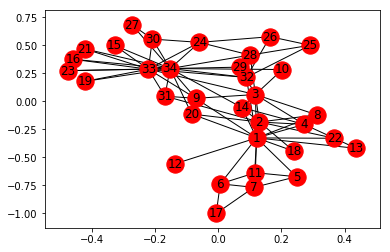

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
kn = nx.read_gml('karate.gml')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn) #Draw the graph

- Сейчас мы можем вычислить PageRank, используя функцию, встроенную в NetworkX. 
- Мы также изобразим вершины графа пропорционально тому, наскольку они важны в смысле величины PageRank'a.

/Users/alex/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


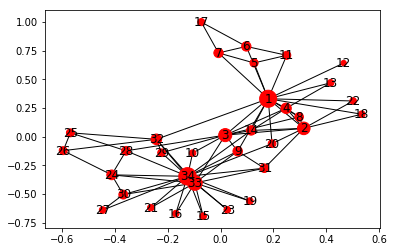

In [4]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)

## Вычисление собственных значений

- Как вычислить собственные значения и собственные векторы? 

Все задачи на собственные значения делятся на два класса:

- полная задача на собственные значения (нужны все собственные значения и собственные векторы)
- частичная задача на собственные значения (требуются минимальное/максимальное собственное значение, или собственные значения из заданного промежутка)

## Вычисление собственных значений с помощью характеристического многочлена

Задача на собственные значения имеет вид

$$ Ax = \lambda x, $$

или

$$ (A - \lambda I) x = 0,$$

поэтому матрица $A - \lambda I$ должна быть вырожденной. Это значит, что её **детерминант** равен нулю: 

$$ p(\lambda) = \det(A - \lambda I) = 0. $$

- Это уравнение называется **характеристическим** и является полиномом степени $n$. 
- Многочлен степени $n$ имеет $n$ комплексных корней!

## Собственные значения и характеристическое уравнение

Вернёмся к собственным значениям.

Характеристическое уравнение можно использовать для вычисления собственных значений, что приводит нас к наивному алгоритму:

$$p(\lambda) = \det(A - \lambda I)$$

1. Вычислить коэффициенты многочлена
2. Найти его корни

**Это хорошая идея?**  

Посмотрим на небольшой пример

Text(0, 0.5, 'Imaginary part')

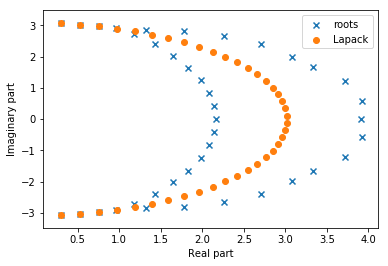

In [5]:
import numpy as np
n = 40
a = [[1.0 / (i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
ev = np.linalg.eigvals(a)
#There is a special numpy function for chacteristic polynomial
cf = np.poly(a)
ev_roots = np.roots(cf)
#print('Coefficients of the polynomial:', cf)
#print('Polynomial roots:', ev_roots)
plt.scatter(ev_roots.real, ev_roots.imag, marker='x', label='Roots')
b = a + 0 * np.random.randn(n, n)
ev_b = np.linalg.eigvals(b)
plt.scatter(ev_b.real, ev_b.imag, marker='o', label='Lapack')
#plt.scatter(ev_roots.real, ev_roots.imag, marker='o', label='Brute force')
plt.legend(loc='best')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')

**Мораль**: 

- Не делайте так, если только у вас нет серьёзной причины
- Поиск корней полинома – очень **плохо обусловленная** задача

## Круги Гершгорина

- Есть интересная теорема, которая часто помогает локализовать собственные значения. 

- Она называется **теоремой Гершгорина**.  

- Она утверждает, что все собственные значения $\lambda_i,  i = 1, \ldots, n$ находятся внутри объединения **кругов Гершгорина** $C_i$, где $C_i$ – окружность на комплексной плоскости с центром в $a_{ii}$ и радиусом

$$r_i = \sum_{j \ne i} |a_{ij}|.$$

Более того, если круги не пересекаются, то они содержат по одному собственному значению внутри каждого круга.

## Демо

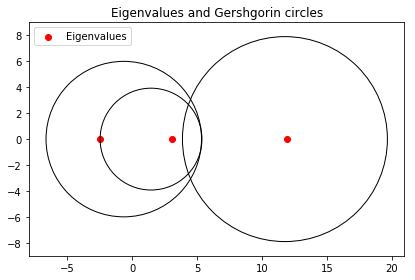

In [6]:
import numpy as np
%matplotlib inline
n = 3
fig, ax = plt.subplots(1, 1)
a = [[5, 1, 1], [1, 0, 0.5], [2, 0, 10]]
#a = [[1.0 / (i - j + 0.5) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
#a = np.diag(np.arange(n))
a = a + 2 * np.random.randn(n, n)
#u = np.random.randn(n, n)
#a = np.linalg.inv(u).dot(a).dot(u)
xg = np.diag(a).real
yg = np.diag(a).imag
rg = np.zeros(n)
ev = np.linalg.eigvals(a)
for i in range(n):
    rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
    ax.add_patch(crc)
plt.scatter(ev.real, ev.imag, color='r', label="Eigenvalues")
plt.axis('equal')
plt.legend()
ax.set_title('Eigenvalues and Gershgorin circles')
fig.tight_layout()

## Степенной метод

- Часто в вычислительной практике требуется найти не весь спектр, а только некоторую его часть, например самое большое или самое маленькое собственные значения. 
- Также отметим, что для симметричных матриц $(A = A^\top)$ собственные значения всегда действительны.
- Степенной метод – простейший метод вычисления **максимального по модулю** собственного значения.

## Степенной метод: детали

Задача на собственные значения

$$Ax = \lambda x, \quad \Vert x \Vert_2 = 1 \ \text{для устойчивости}.$$ 

может быть записана как итерации с неподвижной точкой, которые называются **степенным методом** и дают максимальное по модулю собственное значение матрицы $A$.

Степенной метод имеет вид

$$ x_{k+1} = A x_k, \quad x_{k+1} := \frac{x_{k+1}}{\Vert x_{k+1} \Vert_2}.$$

и $x_{k+1}\to v_1$, где $Av_1 = \lambda_1 v_1$ и $\lambda_1$ максимальное по модулю собственное значение, и $v_1$ – соответствующий собственный вектор.

На $(k+1)$-ой итерации приближение для $\lambda_1$ может быть найдено следующим образом

$$ \lambda^{(k+1)} = (Ax_{k+1}, x_{k+1}). $$

Заметим, что $\lambda^{(k+1)}$ не требуется для $(k+2)$-ой итерации, но может быть полезно для оценки ошибки на каждой итерации: $\|Ax_{k+1} - \lambda^{(k+1)}x_{k+1}\|$. 

Метод сходится со скоростью геометричекой прогрессии, с константой $q = \left|\frac{\lambda_{2}}{\lambda_{1}}\right| < 1$, где $\lambda_1>\lambda_2\geq\dots\geq \lambda_n$. 
Это означает, что сходимость может быть сколь угодно медленной при близких значениях у $\lambda_1$ и $\lambda_2$.

## Что необходимо помнить о степенном методе

- Степенной метод даёт оценку для максимального по модулю собственного числа или спектрального радиуса матрицы
- Одна итерация требует одного умножения матрицы на вектор. Если можно умножить вектор на матрицу за $\mathcal{O}(n)$ (например, она разреженная), тогда степенной метод можно использовать для больших $n$
- Сходимость может быть медленной
- Для грубой оценки максимального по модулю собственного значения и соответствующего вектора достаточно небольшого числа итераций


## А как найти весь спектр?

**Используем матричное разложение!**

##  Для какой матрицы легко найти весь спектр?

Существует класс матриц, для которого собственные числа можно найти очень легко, – это **треугольные матрицы**

$$
  A = \begin{pmatrix}
   \lambda_1 & * & * \\
   0 & \lambda_2 & * \\
   0 & 0 & \lambda_3 \\
  \end{pmatrix}.
$$

Собственные числа матрицы $A$ – $\lambda_1, \lambda_2, \lambda_3$. Почему? 

Потому что детерминант имеет вид 

$$ \det(A - \lambda I) = (\lambda - \lambda_1) (\lambda - \lambda_2) (\lambda - \lambda_3). $$

Таким образом, вычисление собственных значений для треугольной матрицы – простая задача. Теперь на помощь приходят унитарные матрицы. Пусть $U$ унитарная матрица, то есть $U^* U = I$.  Тогда выполнены следующие равенства

$$ \det(A - \lambda I) = \det(U (U^* A U - \lambda I) U^*) = \det(UU^*) \det(U^* A U - \lambda I) = \det(U^* A U - \lambda I), $$

где мы используем свойства детерминанта от произведения матриц, $\det(AB) = \det(A) \det(B)$. 
Это означает, что матрицы $U^* A U$ и $A$ имеют одинаковые характеристические многочлены, и, следовательно, одинаковые собственные значения. 

Если мы приведём матрицу $A$ к верхнетреугольному виду $T$ с помощью унитарной матрицы $U$: $U^* A U = T$, мы решили задачу! 
Умножим слева и справа на $U$ и $U^*$ соответственно, получим нужное нам разложение:  

$$ A = U T U^*. $$

- Это знаменитое **разложение Шура**. 
- Напомним, что использование унитарных матриц приводит к устойчивым алгоритмам, таким образом собственные значения вычисляются очень точно. 
- Разложение Шура показывает, почему нам нужны матричные разложения: они представляют матрицу в виде произведения трёх матриц подходящей структуры.  

## Теорема Шура

**Теорема:** Каждая матрица $A \in \mathbb{C}^{n \times n}$ может быть представлена в виде формы Шура $A = UTU^*$, где $U$ унитарная, а $T$ верхнетреугольная.

## Приложение теоремы Шура

Важное приложение теоремы Шура связано с так называемыми **нормальными матрицами**.  

**Определение.** Матрица $A$ называется **нормальной матрицей**, если  

$$ AA^* = A^* A. $$

**Q:** Какие примеры нормальных матриц вы можете привести?

Примеры: симметричные матрицы, ортогональные матрицы.

## Нормальные матрицы

**Теорема**: $A$ – **нормальная матрица**, тогда и только тогда, когда $A = U \Lambda U^*$, где $U$ унитарна и $\Lambda$ диагональна. 

#### Важное следствие

Любая нормальная матрица – **унитарно диагонализуема**. Это означает, что она может быть приведена к диагональному виду с помощью унитарной матрицы $U$. Другими словами, каждая нормальная матрица имеет ортогональный базис из собственных векторов.

## Как вычислить разложение Шура?

- Узнаем это через несколько слайдов :)

## Вычисление разложения Шура

- Нужно найти унитарную матрицу $U$ и верхнетреугольную матрицу $T$, такие что для данной матрице $A$ выполнено

$$ A = U T U^*. $$ 

## QR алгоритм

- QR алгоритм был предложен в 1961 г. независимо В. Н. Кублановской и J. Francis'ом. Статью про историю этого алгоритма и его авторов можно прочитать [тут](http://www.dm.unibo.it/~guerrini/html/an_09_10/QR_50_years_later.pdf).   

- <font color='red'> **Не путайте** QR алгоритм и QR разложение! </font>

- QR разложение – это представление матрицы в виде произведения двух матриц, а QR алгоритм использует QR разложение для вычисления разложения Шура.


##  Путь к QR алгоритму

Рассмотрим выражение

$$A = Q T Q^*,$$

и перепишем его в виде

$$
   Q T = A Q.
$$

Слева замечаем QR разложение матрицы $AQ$.

Используем его чтобы записать одну итерацию метода неподвижной точки для разложения Шура.

## Вывод QR алгоритма из уравнения неподвижной точки

Запишем следующий итерационный процесс 

$$
    Q_{k+1} R_{k+1} = A Q_k, \quad Q_{k+1}^* A = R_{k+1} Q^*_k
$$

Введём новую матрицу

$$A_k = Q^* _k A Q_k = Q^*_k Q_{k+1} R_{k+1} = \widehat{Q}_k R_{k+1}$$

тогда аппроксимация для $A_{k+1}$ имеет вид

$$A_{k+1} = Q^*_{k+1} A Q_{k+1} = ( Q_{k+1}^* A = R_{k+1} Q^*_k)  = R_{k+1} \widehat{Q}_k.$$

Итак, мы получили стандартную форму записи QR алгоритма.

Финальные формулы обычно записывают в **QRRQ**-форме:

1. Инициализируем $A_0 = A$.
2. Вычислим QR разложение матрицы $A_k$: $A_k = Q_k R_k$.
3. Обновим аппроксимацию $A_{k+1} = R_k Q_k$.

Продолжаем итерации пока $A_k$ не станет достаточно треугольной (например, норма подматрицы под главной диагональю не станет достаточно мала).

## Что известно о сходимости и сложности

**Утверждение**

Матрицы $A_k$ унитарно подобны матрице $A$

$$A_k = Q^*_{k-1} A_{k-1} Q_{k-1} = (Q_{k-1} \ldots Q_1)^* A (Q_{k-1} \ldots Q_1)$$

а произведение унитарных матриц – унитарная матрица.

Сложность одной итерации $\mathcal{O}(n^3)$, если используется QR разложение для общего случая.

Мы ожидаем, что $A_k$ будет **очень близка к треугольной матрице** для достаточно большого $k$.

In [9]:
import numpy as np
n = 4
a = [[1.0/(i + j + 0.5) for i in range(n)] for j in range(n)]
niters = 200
for k in range(niters):
    q, rmat = np.linalg.qr(a)
    a = rmat.dot(q)
print('Leading 3x3 block of a:')
print(a[:3, :3])

Leading 3x3 block of a:
[[ 2.41052440e+000 -5.41127562e-017 -4.10963400e-017]
 [ 2.42500623e-168  3.49984625e-001  5.13648922e-017]
 [ 0.00000000e+000  6.56745067e-273  1.53236733e-002]]


## Сходимость и сложность QR алгоритма

- QR алгоритм сходится от первого диагонального элемента к последнему.

- По крайней мере 2-3 итерации необходимо для определения каждого диагонального элемента матрицы $T$. 

- Каждый шаг состоит в вычислении QR разложения и одного произведения двух матриц, в результате имеем сложность $\mathcal{O}(n^3)$.

**Q**: означает ли это итоговую сложность $\mathcal{O}(n^4)$? 

**A**: к счастью, нет! 

- Мы можем ускорить QR алгоритм, используя сдвиги, поскольку матрица $A_k - \lambda I$ имеет те же векторы Шура (столбцы матрицы $U$).

## Выводы по матричным разложениям

- LU и QR разложения можно вычислить с помощью **прямых** методов за конечное число операций.

- SVD и разложение Шура не могут быть вычислены с помощью прямых методов (почему?). Они могут быть получены с помощью **итерационных методов**

- Однако итерационные методы также имеют сложность $\mathcal{O}(n^3)$ операций благодаря быстрой сходимости.

## Резюме по сегодняшней лекции

- Собственные значения и векторы
- Теорема Гершгорина
- Степенной метод
- Теорема Шура
- Нормальные матрицы
- QR алгоритм